# Homework 1
## Part a: Constant Temperature Anemometry (5 points)
### a1)

b) average of the residuals, as absolute value or not?
averaged error from residuals or other method, error estimate of fit parameters? (1/T or T?)
b4) Single point or general higher absolute residual for highest error.

Text(0.5, 1.0, 'CTA measurment with bubbles')

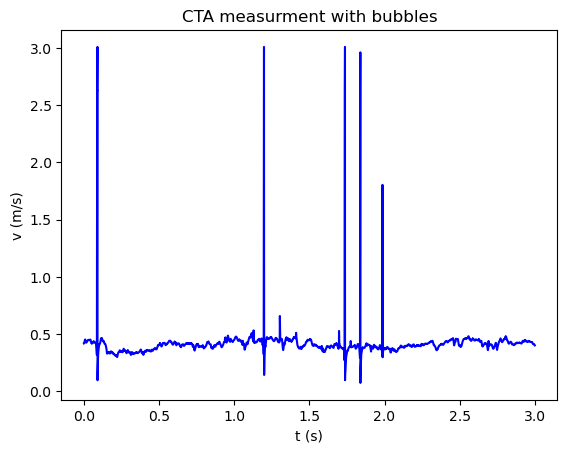

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# using loadtxt()
arr = np.loadtxt("Data/CTA_data.csv", skiprows=1, delimiter=',')
t = arr[:30000-1,0]
v = arr[:30000-1, 1]
mask = arr[:30000-1,2]

plt.figure()
plt.plot(t, v, c='b')
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.title('CTA measurment with bubbles')
plt.show()

Text(0.5, 1.0, 'CTA measurment without bubbles')

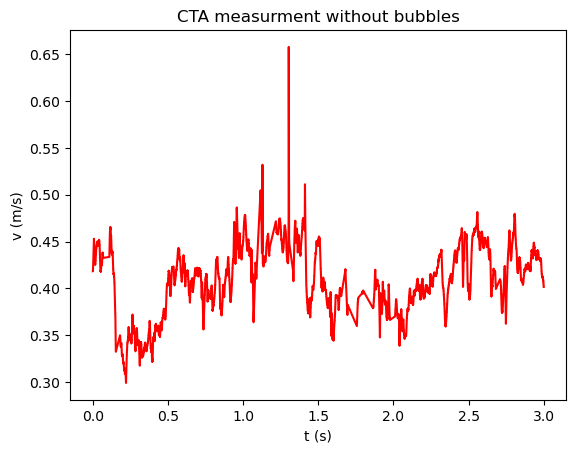

In [3]:
vmask = np.ma.masked_where(mask==0, v)
vmask = vmask.compressed()
tmask = np.ma.masked_where(mask==0, t)
tmask = tmask.compressed()

plt.figure()
plt.plot(tmask, vmask, c='r')
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.title('CTA measurment without bubbles')
plt.show()

### a2)

In [4]:
t = arr[:,0]
v = arr[:, 1]
mask = arr[:,2]

vmask = np.ma.masked_where(mask==0, v)
vmask = vmask.compressed()
tmask = np.ma.masked_where(mask==0, t)
tmask = tmask.compressed()

mean_bub = np.mean(v)
std_bub = np.std(v)
mean_nobub = np.mean(vmask)
std_nobub = np.std(vmask)

print(f'mean with bubbles = {round(mean_bub, 3)}')
print(f'std with bubbles = {round(std_bub, 3)}')
print(f'mean without bubbles = {round(mean_nobub, 3)}')
print(f'std without bubbles = {round(std_nobub, 3)}')

mean with bubbles = 0.402
std with bubbles = 0.116
mean without bubbles = 0.399
std without bubbles = 0.04


We now look at the entire dataset again, not just the first three seconds. As we can see from the values listed above, the mean is almost the same for sets of data (with and without bubbles). There is a more significant difference for the standard deviation, which is much smaller for the case without bubbles. This makes sense, as the standard deviation is a measure for how much the velocity fluctuates around the mean. The bubbles cause outliers in the data, removing these outliers gives a smaller standard deviation. The mean is not as affected, because there are so many other datapoints with which to calculate the mean.

### a3)
See the figures below, one shows the PDF on a logarithmic scale. If we choose the bin size too small (i.e. too many bins), then there is a good chance some bins will be empty and we will get an awkward discontinous graph. If we choose the bin size too big, then we might loose inforation such as local maxima and minima in the spectrum. We chose a binsize, which leaves a few holes in the zoomed out graph, but this is not an area of interest. If we choose the binsize to be big enough to not have holes there, we would lose information for the rest of the graph. Now we look at the graphs we have, first off we can see that the higher velocities have been filtered out when we remove the bubbles. At first the zoomed graphs seems very gaussian, however the logaritmic plot reveals that this is actually not the case. Both have some skew and curtosis. The velocities with the bubbles have more lower velocity components.

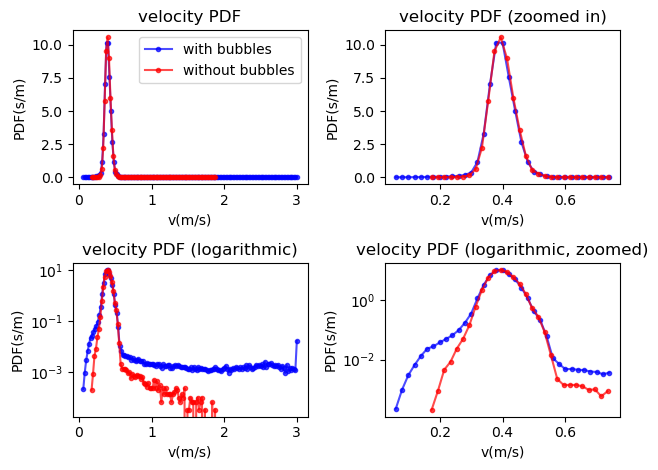

In [46]:
# We wish to make PDFs with equal binsizes
binwidth = 0.02
bins = np.arange(min(v), max(v) + binwidth, binwidth)

a = np.histogram(v, bins=bins, density=True)
dv = abs((a[1][1]-a[1][2]))*0.5
binmids = dv + a[1][:-1]

bins = np.arange(min(vmask), max(vmask) + binwidth, binwidth)
a1 = np.histogram(vmask, bins=bins, density=True)
dv = abs((a1[1][1]-a1[1][2]))*0.5
binmids1 = dv + a1[1][:-1]

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(binmids, a[0], color='b', label='with bubbles', alpha=0.7, marker='.')
axs[0, 0].plot(binmids1, a1[0], color='r', label='without bubbles', alpha=0.7, marker='.')
axs[0, 0].set_title('velocity PDF')
axs[0, 0].legend()

axs[0, 1].plot(binmids[binmids<0.75], a[0][binmids<0.75], color='b', label='with bubbles', alpha=0.7, marker='.')
axs[0, 1].plot(binmids1[binmids1<0.75], a1[0][binmids1<0.75], color='r', label='without bubbles', alpha=0.7, marker='.')
axs[0, 1].set_title('velocity PDF (zoomed in)')

axs[1, 0].plot(binmids, a[0], color='b', label='with bubbles', alpha=0.7, marker='.')
axs[1, 0].plot(binmids1, a1[0], color='r', label='without bubbles', alpha=0.7, marker='.')
axs[1, 0].set_title('velocity PDF (logarithmic)')
axs[1, 0].set_yscale('log')

axs[1, 1].plot(binmids[binmids<0.75], a[0][binmids<0.75], color='b', label='with bubbles', alpha=0.7, marker='.')
axs[1, 1].plot(binmids1[binmids1<0.75], a1[0][binmids1<0.75], color='r', label='without bubbles', alpha=0.7, marker='.')
axs[1, 1].set_title('velocity PDF (logarithmic, zoomed)')
axs[1, 1].set_yscale('log')

for ax in axs.flat:
    ax.set(xlabel='v(m/s)', ylabel='PDF(s/m)')
    
fig.tight_layout()

VERHAALTJE OVER GOEDE BINSIZE KIEZEN, zie plotjes hieronder

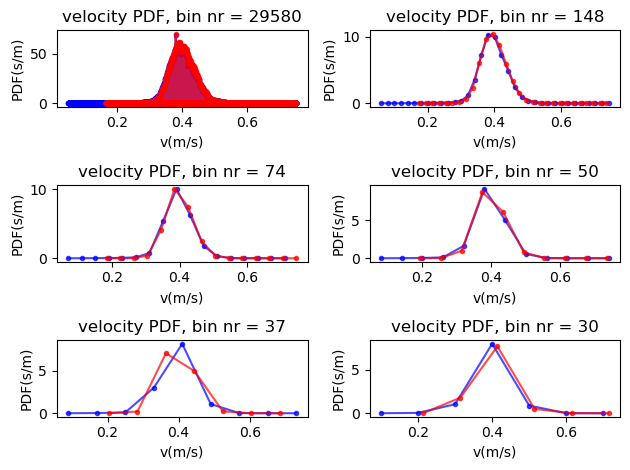

In [51]:
fig, axs = plt.subplots(3, 2)
binwidth = 0.0001 #could be turned into a list of values to try
for i in range(3):
    for j in range(2):
        # We wish to make PDFs with equal binsizes
        bins = np.arange(min(v), max(v) + binwidth, binwidth)

        a = np.histogram(v, bins=bins, density=True)
        dv = abs((a[1][1]-a[1][2]))*0.5
        binmids = dv + a[1][:-1]

        bins = np.arange(min(vmask), max(vmask) + binwidth, binwidth)
        a1 = np.histogram(vmask, bins=bins, density=True)
        dv = abs((a1[1][1]-a1[1][2]))*0.5
        binmids1 = dv + a1[1][:-1]
        
        axs[i, j].plot(binmids[binmids<0.75], a[0][binmids<0.75], color='b', label='with bubbles', alpha=0.7, marker='.')
        axs[i, j].plot(binmids1[binmids1<0.75], a1[0][binmids1<0.75], color='r', label='without bubbles', alpha=0.7, marker='.')
        axs[i, j].set_title(f'velocity PDF, bin nr = {len(binmids)}')
        binwidth += 0.02
for ax in axs.flat:
    ax.set(xlabel='v(m/s)', ylabel='PDF(s/m)')
    
fig.tight_layout()

## Part b: Thermistor principles and calibration (9 points)
### b1)

In [19]:
from scipy.optimize import curve_fit

def func(R, a, b, c):
    return a + b*np.log(R) + c*(np.log(R)**3)

# using loadtxt()
arr = np.loadtxt("Data/thermistor.csv", skiprows=1, delimiter=',')
R = arr[:,0]
T = arr[:, 1] + 274.15 #convert to kelvin

#fit to function and plot
popt, pcov = curve_fit(func, R, 1/T)

A = popt[0]
B = popt[1]
C = popt[2]

errors = np.sqrt(np.diag(pcov))

print(f'A = {A:.6g} +- {errors[0]:.2g}')
print(f'B = {B:.7g} +- {errors[1]:.2g}')
print(f'C = {C:.9g} +- {errors[2]:.2g}')

A=0.00099962 +- 2.5e-05
B=0.0002418801 +- 4.3e-06
C=1.42980025e-07 +- 1.8e-08


### b2)

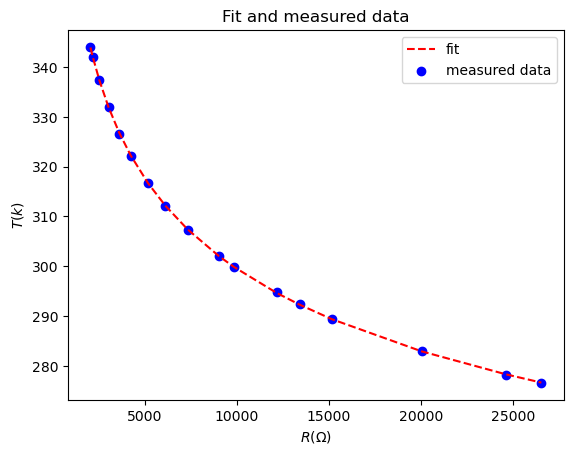

In [62]:
Tcalc = 1/func(R, *popt)

plt.figure()
plt.plot(R, Tcalc, 'r--', label='fit')
plt.scatter(R, T, c='b', label='measured data')
plt.xlabel(r'$R(\Omega)$')
plt.ylabel(r'$T(k)$')
plt.title('Fit and measured data')
plt.legend()
plt.show()

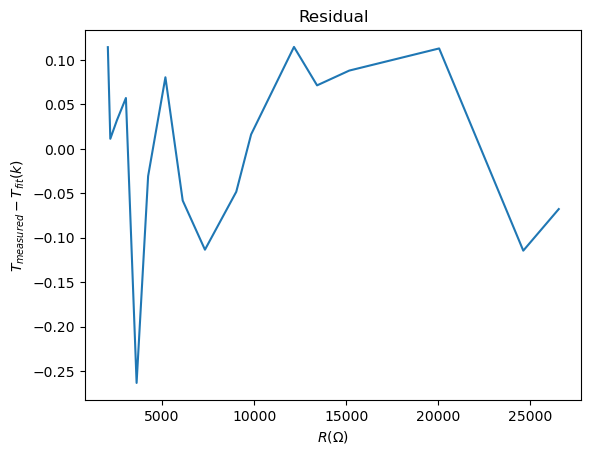

In [63]:
residual = T - (1/func(R, *popt))

plt.figure()
plt.plot(R, residual)
plt.xlabel(r'$R(\Omega)$')
plt.ylabel(r'$T_{measured}-T_{fit}(k)$')
plt.title('Residual')
plt.show()


In [64]:
err = np.average(abs(residual))
print(round(err, 3))

0.082


### b4)
The biggest error is seen around R=3600 $\Omega$, where it deviates -0.25k from the expected value according to the steinhart equation. The averaged error is 0.08 k.

### b5)
From the electrical circuit: $V_{th}=R_{th}I_{tot}$ and $V_{tot}=(R_{th}+R_{passive})I_{tot}$, combing the two equations we get
$V_{th}=\frac{R_{th}V{tot}}{R_{th}+R_{passive}}$
\
$\frac{d V_{th}}{d R_{th}} = \dfrac{R_{passive}V_{tot}}{\left(R_{th}+R_{passive}\right)^2}$
\
From this equation we can see that if we make $R_{passive}$ too big, then $R_{th}$ will not matter in the denominator and we will not have a big change in the measured voltage $V_{th}$ with temperature. On the other hand if we make $R_{passive}$ too small, then the change in $V_{th}$ will also be very small with a change in $R_{th}$. So we want to choose our $R_{passive}$ to be the same order of magnitude as $R_{th}$, so ~$3\cdot10^{3} \Omega$. This way we can measure small changes in temperature in the range we are currently working in. To illustrate this, we have plotted the measured $V_{th}$ for a voltage source of 10V for different $R_{Passive}$ in the temperature range we are measuring in.

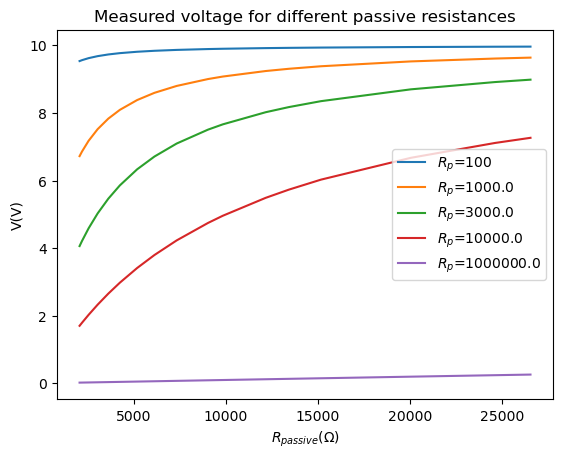

In [71]:
Rp_list = [100, 1e3 ,3e3, 1e4, 1e6]
Vtot = 10
for i in range(len(Rp_list)):
    Rp = Rp_list[i]
    Vth = R*Vtot/(R+Rp)
    plt.plot(R, Vth, label=f'$R_p$={Rp}')
plt.xlabel(r'$R_{passive}(\Omega)$')
plt.ylabel('V(V)')
plt.title('Measured voltage for different passive resistances')
plt.legend()
plt.show()


### b6)

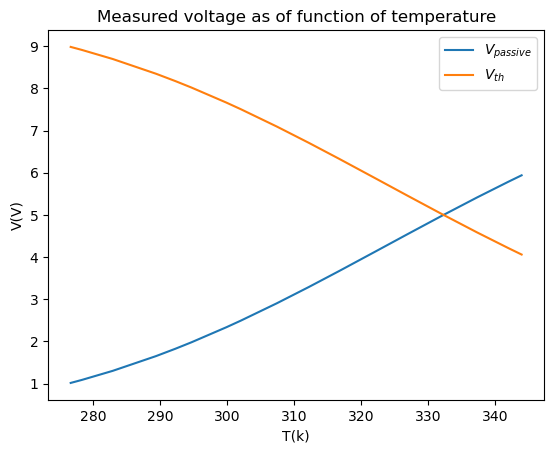

In [73]:
Rp = 3e3
Vtot = 10
Vth = R*Vtot/(R+Rp)
Vpas = Vtot- Vth

plt.figure()
plt.plot(Tcalc, Vpas, label=r'$V_{passive}$')
plt.plot(Tcalc, Vth, label=r'$V_{th}$')
plt.xlabel('T(k)')
plt.ylabel('V(V)')
plt.title('Measured voltage as of function of temperature')
plt.legend()
plt.show()